In [15]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist
import numpy as np# Подключаем библиотеку для работы с числовыми массивами numpy
from PIL import Image
from PIL import ImageDraw
# под псевдонимом np
%matplotlib inline

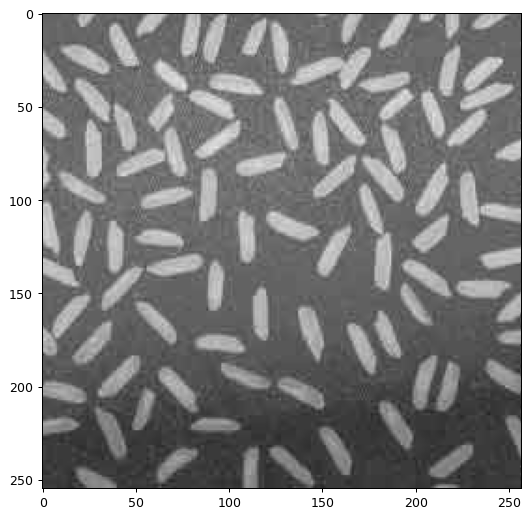

In [6]:
img_path = "rice.jpg"
img = Image.open(img_path).convert('RGB')
plt.figure(figsize=(8,7), dpi=90)
plt.imshow(img)

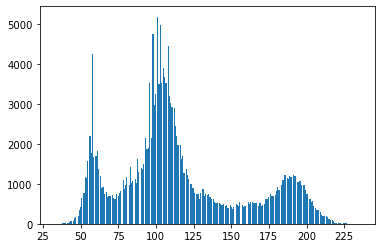

In [7]:
plt.hist(np.ravel(img), bins=256)
plt.show()

In [27]:
def f_log(x):
 c = 32
 return int(c * np.log(x + 1))

def draw_image3(image, imageNew):
    plt.figure(figsize=(16,13), dpi=90)
    plt.subplot2grid((3,3), (0,0))
    plt.imshow(image)
    plt.title('Исходное изображение')
    plt.subplot2grid((3,3), (0,1))
    plt.imshow(imageNew)
    plt.title('Преобразованное изображение')
    plt.subplot2grid((3,3), (0,2))
    plt.hist(np.ravel(image), bins=256, label=['Оригинал'])
    plt.hist(np.ravel(imageNew), bins=256, label=['Результат']) 
    plt.title('Гистограмма интенсивности цвета')
    plt.legend()
    plt.show()
    
def transform(f, img):
    img_copy = img.copy() # Преобразовывать будем копию исходного изображения
    draw = ImageDraw.Draw(img_copy) #Создаем инструмент для рисования
    width = img_copy.size[0] #Определяем ширину
    height = img_copy.size[1] #Определяем высоту 
    pixels = img_copy.load() #Выгружаем значения пикселей
    for i in range(width):
        for j in range(height):
            r, g, b = pixels[i, j]
            S = tuple(map(f, (r, g, b)))
            draw.point((i, j), S)
    draw_image3(img, img_copy) 


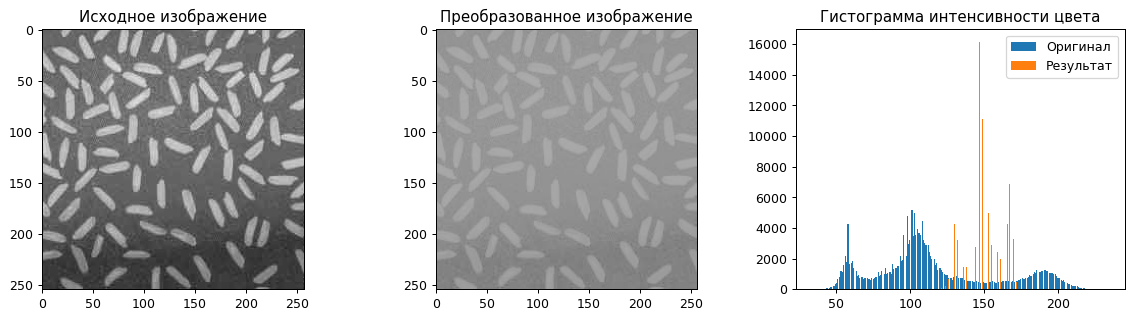

In [28]:
transform(f_log, img)

In [50]:
def f_gamma(x):
    c = 0.0002
    return min(255, int(c * x**2.6))

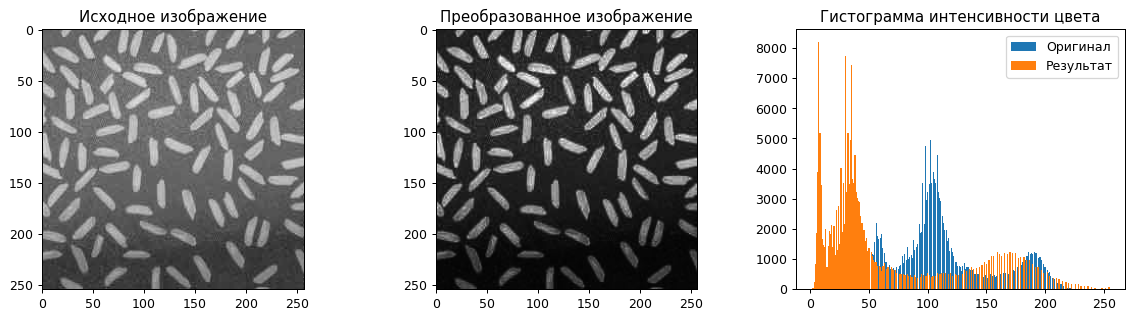

In [51]:
transform(f_gamma, img)

In [93]:
def f1(x): # 1е из кусочно-линейных преобразований
    x1 = 50
    x2 = 130
    if x < x1 or x > x2:
        return int(2 * x)
    return int(0.5 * x)

def f2(x): # 2е из кусочно-линейных преобразований
    x1 = 50
    x2 = 128
    if x < x1 or x > x2:
        return int(0.5 * x)
    return int(2 * x)

def f3(x): # интервальная бинаризация 
    x1 = 50
    x2 = 130
    if x2 > x > x1:
        return 255
    return 0

def f4(x): # интервальная бинаризация 
    x2 = 130
    if x < x2:
        return 0
    return 255


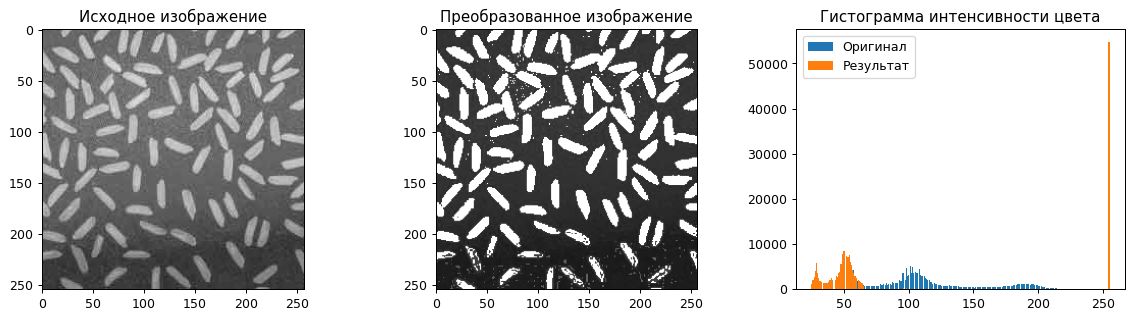

In [77]:
transform(f1, img)

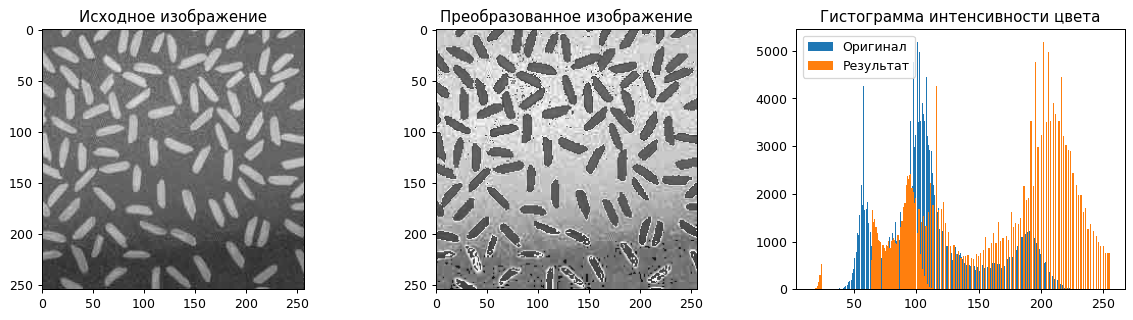

In [82]:
transform(f2, img)

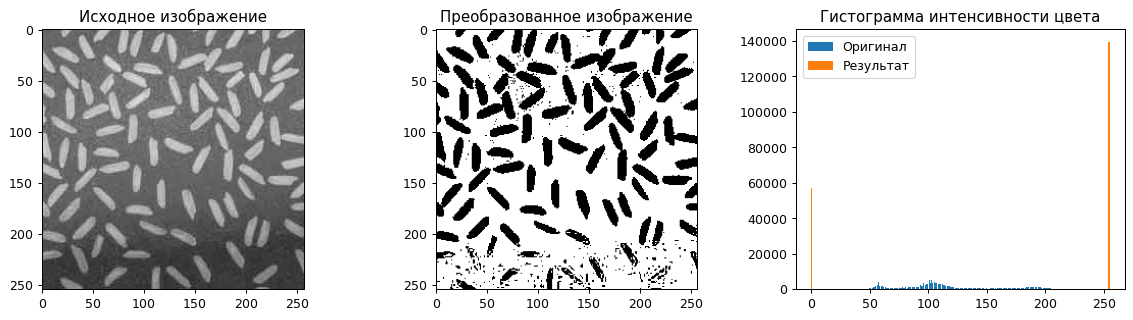

In [94]:
transform(f3, img)

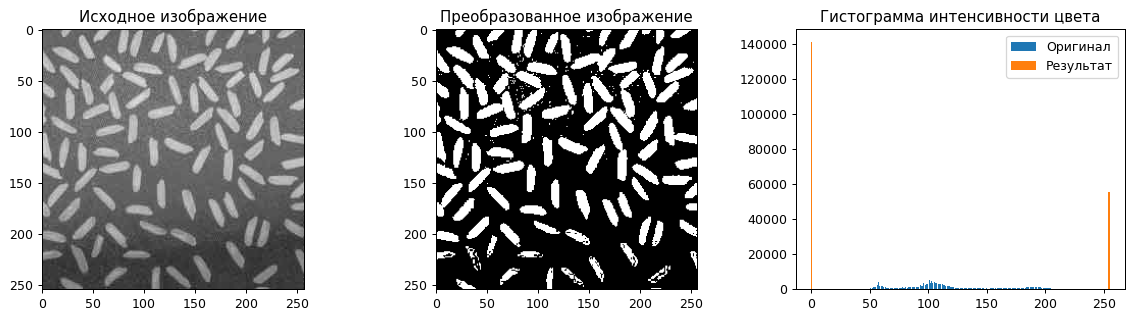

In [33]:
transform(f4, img)

In [124]:
def f_bin(x):
    return 0 if x in range(30, 130) else 255


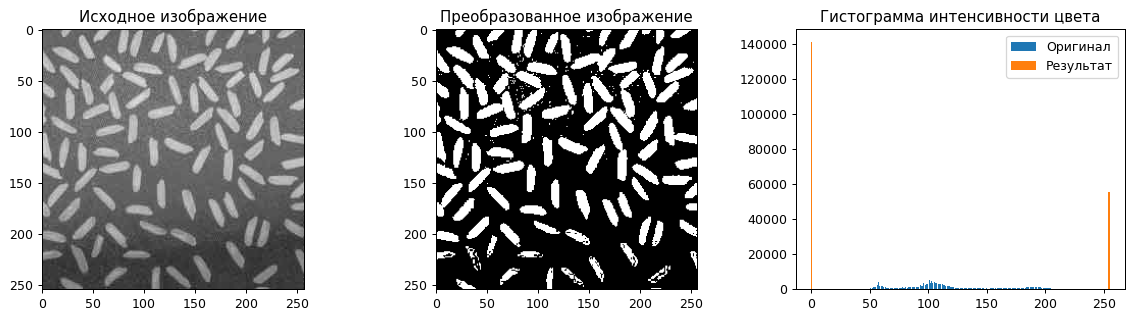

In [125]:
transform(f_bin, img)